## How to survive in Baltimore- Crime Analysis

### Problem:

The city of Baltimore is the most populous city in the U.S. state of Maryland but is infamous for having most criminal activities taking place. According to Forbes, Baltimore is the seventh dangerous city in the United States. By applyting data mining techniques on the Baltimore crime which contains a record of criminal activity across Balitmore. 

##### Questions

Median number of crimes in Baltimore
What day was most filled with crimes? Why?
What day was with minimum number of crimes? Why?
What crimes are most often in Baltimore?
What day of the week are most of crimes?
How to survive in Baltimore? Buiding the heatmap.

##### Dataset Information

The detset used is the Baltimore Crime Dataset which contains incidents derived from BPD Reporting System. The dataset contains around 276529 records. 

###### Attributes:

There are 15 attributes/columns in the dataset which are as follows:
  1. Crime date
  2. CrimeTime
  3. CrimeCode
  4. Location
  5. Description
  6. Inside/Outside: if the crime occuried indoors or outdoors
  7. Weapon: Weapon that was used in the crime
  8. Post
  9. District: The district where the crime happened.
  10. Neighborhood: The neighborhood in which the crime took place.
  11. Latitude
  12. Longitude
  13. Premise
  14. Total incidents
  15. Location 1

In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [274]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
import folium
from folium import plugins
from folium.plugins import HeatMap

In [275]:
#import data 
df= pd.read_csv('Baltimore.csv')
df.columns

Index(['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description',
       'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood',
       'Longitude', 'Latitude', 'Location 1', 'Premise', 'Total Incidents'],
      dtype='object')

#### Data Preprocessing

The dataset contains alot of NA values in the dataset. The following steps were performed for data preprocessing:
 1. Fill NA values in 'Weapons' column with 'Missing'.
 2. Column District has more NA values compared to Neighborhood. We have derived the values of District from the Neighborhood column. 
 3. Inside/Outside column also contains I for Inside and O for Outside. We also replace the NA values with 'Missing'.
 4. We create an additional column in called ' Crime Group' where we categories reported incidents based on their description. 
 5. Further, we drops 'Neighborhood','Location 1','Premise', 'Post'. 
 

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276529 entries, 0 to 276528
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeDate        276529 non-null  object 
 1   CrimeTime        276529 non-null  object 
 2   CrimeCode        276529 non-null  object 
 3   Location         274322 non-null  object 
 4   Description      276529 non-null  object 
 5   Inside/Outside   266250 non-null  object 
 6   Weapon           95577 non-null   object 
 7   Post             276305 non-null  float64
 8   District         276449 non-null  object 
 9   Neighborhood     273789 non-null  object 
 10  Longitude        274325 non-null  float64
 11  Latitude         274325 non-null  float64
 12  Location 1       274325 non-null  object 
 13  Premise          265772 non-null  object 
 14  Total Incidents  276529 non-null  int64  
dtypes: float64(3), int64(1), object(11)
memory usage: 31.6+ MB


In [277]:
df.isnull().sum()

CrimeDate               0
CrimeTime               0
CrimeCode               0
Location             2207
Description             0
Inside/Outside      10279
Weapon             180952
Post                  224
District               80
Neighborhood         2740
Longitude            2204
Latitude             2204
Location 1           2204
Premise             10757
Total Incidents         0
dtype: int64

In [278]:
df.Weapon =df['Weapon'].fillna('MISSING')

In [279]:
df.isnull().sum()

CrimeDate              0
CrimeTime              0
CrimeCode              0
Location            2207
Description            0
Inside/Outside     10279
Weapon                 0
Post                 224
District              80
Neighborhood        2740
Longitude           2204
Latitude            2204
Location 1          2204
Premise            10757
Total Incidents        0
dtype: int64

In [280]:
grouped_df = df.groupby('District')['Neighborhood'].unique().reset_index()
b_to_a_mapping = {}

# Iterate over each row in the grouped_df and populate the dictionary
for val, row in grouped_df.iterrows():
    a_value = row['District']
    b_values = row['Neighborhood']
    for b in b_values:
        b_to_a_mapping[b] = a_value

# Update the missing values in column A based on the mapping
df['District'] = df['District'].fillna(df['Neighborhood'].map(b_to_a_mapping))


# Print the updated dataframe
df.isnull().sum()

CrimeDate              0
CrimeTime              0
CrimeCode              0
Location            2207
Description            0
Inside/Outside     10279
Weapon                 0
Post                 224
District               0
Neighborhood        2740
Longitude           2204
Latitude            2204
Location 1          2204
Premise            10757
Total Incidents        0
dtype: int64

In [281]:
df['Inside/Outside']= df['Inside/Outside'].replace({'I':'Inside', 'O':'Outside'})
df['Inside/Outside'].unique()

array(['Inside', 'Outside', nan], dtype=object)

In [282]:
df['Inside/Outside'].fillna('MISSING', inplace= True)

In [283]:
df.dropna(subset=['Location'], inplace=True)

In [284]:
df.isnull().sum()

CrimeDate              0
CrimeTime              0
CrimeCode              0
Location               0
Description            0
Inside/Outside         0
Weapon                 0
Post                   7
District               0
Neighborhood         536
Longitude              0
Latitude               0
Location 1             0
Premise            10683
Total Incidents        0
dtype: int64

In [285]:
df.drop(columns=['Neighborhood','Location 1','Premise', 'Post'], inplace=True)

In [286]:
df.isnull().sum()

CrimeDate          0
CrimeTime          0
CrimeCode          0
Location           0
Description        0
Inside/Outside     0
Weapon             0
District           0
Longitude          0
Latitude           0
Total Incidents    0
dtype: int64

In [287]:
df['Description'].unique()

array(['ROBBERY - RESIDENCE', 'AUTO THEFT', 'SHOOTING', 'AGG. ASSAULT',
       'COMMON ASSAULT', 'BURGLARY', 'HOMICIDE', 'ROBBERY - STREET',
       'ROBBERY - COMMERCIAL', 'LARCENY', 'LARCENY FROM AUTO', 'ARSON',
       'ROBBERY - CARJACKING', 'ASSAULT BY THREAT', 'RAPE'], dtype=object)

In [288]:
keyword_mapping = {
    'ROBBERY': ['ROBBERY'],
    'ASSAULT': ['ASSAULT'],
    'ARSON': ['ARSON'],
    'LARCENY': ['LARCENY', 'LARCENY FROM AUTO'],
    'RAPE': ['RAPE'],
    'SHOOTING': ['SHOOTING'],
    'AUTO THEFT': ['AUTO THEFT'],
    'HOMICIDE': ['HOMICIDE'],
    'BURGLARY': ['BURGLARY']
}

# Create a new column 'Crime Group' with empty values
df['Crime Group'] = ''

# Categorize descriptions based on keywords
for category, keywords in keyword_mapping.items():
    mask = df['Description'].str.contains('|'.join(keywords), na=False, case=False)
    df.loc[mask, 'Crime Group'] = category


In [289]:
df.isnull().sum()

CrimeDate          0
CrimeTime          0
CrimeCode          0
Location           0
Description        0
Inside/Outside     0
Weapon             0
District           0
Longitude          0
Latitude           0
Total Incidents    0
Crime Group        0
dtype: int64

In [290]:
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,District,Longitude,Latitude,Total Incidents,Crime Group
0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,Inside,KNIFE,SOUTHERN,-76.60541,39.22951,1,ROBBERY
1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,Outside,MISSING,CENTRAL,-76.63217,39.31360,1,AUTO THEFT
2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,NORTHERN,-76.60697,39.34768,1,SHOOTING
3,09/02/2017,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,Inside,OTHER,SOUTHERN,-76.64526,39.28315,1,ASSAULT
4,09/02/2017,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,Outside,HANDS,CENTRAL,-76.61365,39.28756,1,ASSAULT


In [291]:
#df['CrimeTime'] = pd.to_datetime(df['CrimeTime'])

# Extract the hour of the day in the range 0 to 23
df['Hour'] = df['CrimeTime'].str.split(':').str[0]


In [292]:
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'], format='%m/%d/%Y')

# Extract day of the week
df['DayOfWeek'] = df['CrimeDate'].dt.day_name()

#### Data Visualization

#### 1. Average number of crimes in Baltimore.

In [317]:
df['CrimeDate'].value_counts().median()

133.0

The median of crime in Baltimore is 133 which is quiet high. The graph below shows the Weapons used in these crimes. If the data of the where the weapon used isn't mentioned is ignore, we can wee that more of the criminals attacked without any weapon with just their hands.

C:\Users\cheta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Nuumber of Incidents per Weapon')

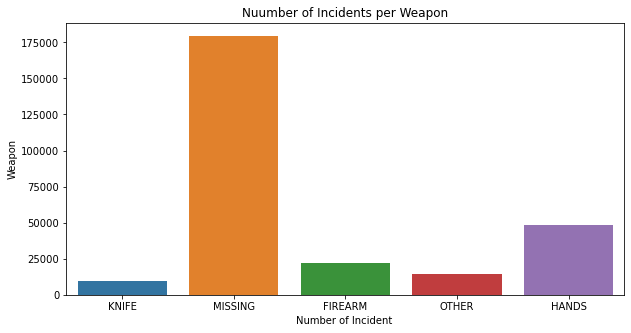

In [293]:
plt.subplots(figsize=(10,5))
sns.countplot('Weapon', data= df)
plt.xlabel("Number of Incident ")
plt.ylabel("Weapon")
plt.title("Nuumber of Incidents per Weapon")


##### 2. What type of Crime is highest in Baltimore considering Weapons used?

C:\Users\cheta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Crime Group', ylabel='count'>

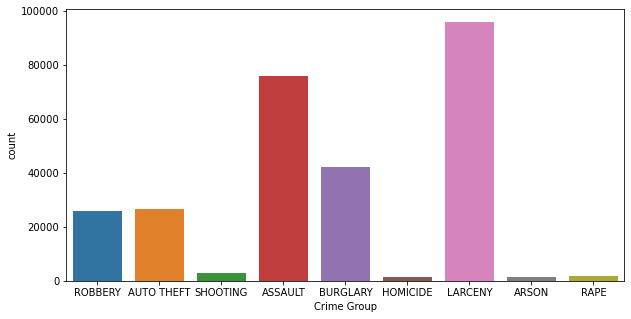

In [324]:
plt.subplots(figsize=(10,5))
sns.countplot('Crime Group', data= df)

Here, we can see that Larceny is the highest type of Crime that was reported in Baltimore.

##### 3. What is the minimum and maximum number of crimes ? Why ?

In [318]:
df['CrimeDate'].value_counts().tail(3)

2016-01-24    45
2014-02-13    44
2016-01-23    33
Name: CrimeDate, dtype: int64

In [325]:
df['CrimeDate'].value_counts().head(3)

2015-04-27    410
2016-06-05    255
2017-01-20    194
Name: CrimeDate, dtype: int64

 1. The lowest crime rate was reported on Jan 23, 2016. This is because it was day of after the biggest showstorm recorded in the history of Baltimore.
 
 2. The highest crime rate was recorded on Apr 27, 2015. This is because Freddy Gray funeral and the following riot took place this day.
 
 Let see what is the type of crime took place the most on this day:

<AxesSubplot:>

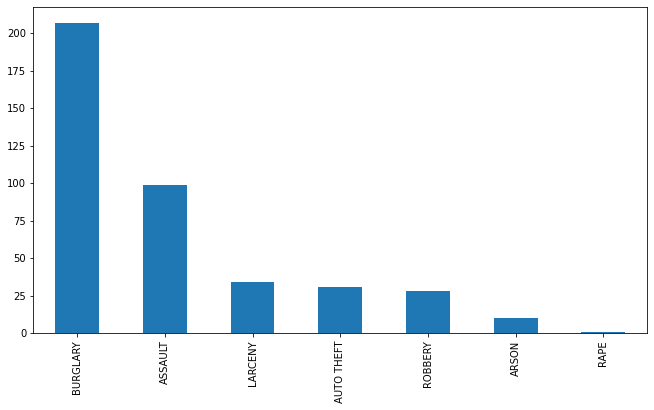

In [327]:
#df_fgray = df['CrimeDate'] == '04/27/2015'
df.loc[df['CrimeDate'] == '04/27/2015']['Crime Group'].value_counts().plot.bar(figsize=(11, 6))

Here we can see the that the highest crime type that was reported on Apr 27, 2015 was Burglaries.

###### 4. Which day of the week and  time of a day was most crime reported?

From the graph below, we can see that the maximum number of crimes take place on Friday and followed by Monday. This means that the number of crimes increases with weekend approach.

Text(0.5, 1.0, 'Crime Counts by Day of the Week')

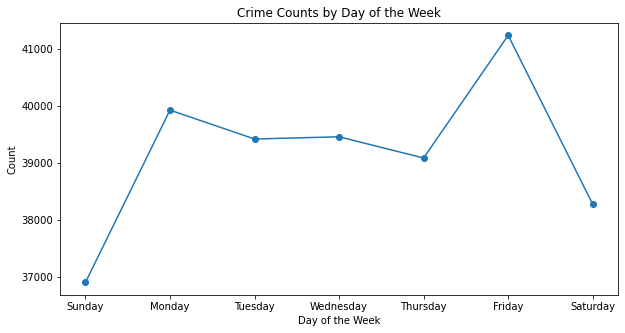

In [305]:
# plot for 
weekday_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df['DayOfWeek']= pd.Categorical(df['DayOfWeek'], categories=weekday_names, ordered=True)

day_counts = df['DayOfWeek'].value_counts().sort_index()
plt.subplots(figsize=(10,5))
# Create the line graph
plt.plot(day_counts.index, day_counts.values, marker='o', linestyle='-')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Crime Counts by Day of the Week')


The graph below shows that distribution of crimes at each hour of the day. It can be seen that 5:00 am is safest part of the day where as 7:00 pm is the most dangerous hour with the highest reported incidents. In addition to this there is a peak increase in crime reported from 4 pm to 8 pm.

C:\Users\cheta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hour', ylabel='count'>

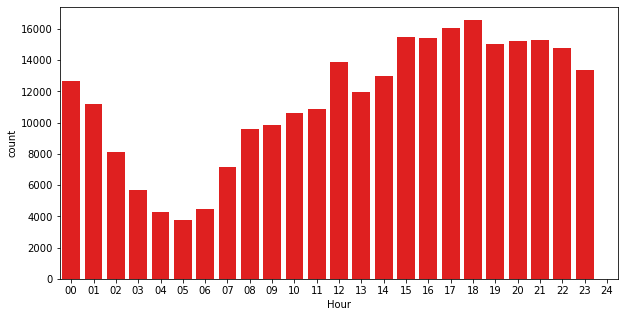

In [294]:
sorted_x_axis = sorted(df['Hour'].unique())
plt.subplots(figsize=(10,5))
sns.countplot('Hour' , data=df, order=sorted_x_axis, color= 'Red')

The below graph shows distribution of number of crime throughout the day on Friday. There is a significance dip in the crime rate around 5:00 am. On a Friday ther is a significant increase in the crime rate from 3:00 pm which peaks on 6:00 pm.

Text(0.5, 1.0, 'Hourly Crimes Reported on Fridays')

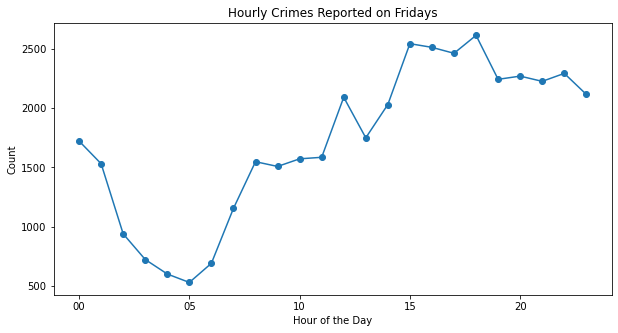

In [307]:
fridays = df[df['CrimeDate'].dt.day_name() == 'Friday']

# Group by hour and count the number of crimes reported in each hour
hourly_counts = fridays['Hour'].value_counts().sort_index()

# Create the line plot
hourly_counts.plot(kind='line', figsize=(10,5), marker='o', linestyle='-')

# Set plot labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.title('Hourly Crimes Reported on Fridays')


###### 5. What is the safest spots in Baltimore?

 The heatmaps below highlight the areas that have reported most crimes on Friday. Continuing on our previous first map shows the amount of crimes reported on Friday on Baltimore based on the area. We futher expore the number of crimes reported per area based on the type of crime. 
We can observe that area around the Maryland Zoo in Baltimore, John Hopkins University, Herring Run Park, Carroll Park and along the coast like Inner Harbor, Little Italy, and Federal Hill.  are safer. 

In [308]:
m = folium.Map(location=[39.3121, -76.6198], zoom_start=13)

df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
# heat_df = df[df['CrimeDate']=='2015-04-27'] # Reducing data size so it runs faster
heat_df = fridays # Reducing data size so it runs faster
# heat_df = df[['Latitude', 'Longitude']]
# heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude'])

# List comprehension to make out list of lists
heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(m)

In [309]:
m

In [310]:
heat_df = fridays # Reducing data size so it runs faster
# heat_df = df[['Latitude', 'Longitude']]
# heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude'])

# List comprehension to make out list of lists
heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(m)

In [311]:
m = folium.Map(location=[39.3121, -76.6198], zoom_start=13)

df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
# heat_df = df[df['CrimeDate']=='2015-04-27'] # Reducing data size so it runs faster
heat_df = df.loc[(df['CrimeDate'].dt.day_name() == 'Friday') & (df['Crime Group']=='ROBBERY')] # Reducing data size so it runs faster
# heat_df = df[['Latitude', 'Longitude']]
# heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude'])

# List comprehension to make out list of lists
heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(m)
m

In [312]:
heat_df = df.loc[(df['CrimeDate'].dt.day_name() == 'Friday') & (df['Crime Group']=='AUTO THEFT')] # Reducing data size so it runs faster
# heat_df = df[['Latitude', 'Longitude']]
# heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude'])

# List comprehension to make out list of lists
heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(m)
m

In [314]:
heat_df = df.loc[(df['CrimeDate'].dt.day_name() == 'Friday') & (df['Crime Group']=='SHOOTING')] # Reducing data size so it runs faster
# heat_df = df[['Latitude', 'Longitude']]
# heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude'])

# List comprehension to make out list of lists
heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(m)
m

In [315]:
heat_df = df.loc[(df['CrimeDate'].dt.day_name() == 'Friday') & (df['Crime Group']=='BURGLARY')] # Reducing data size so it runs faster
# heat_df = df[['Latitude', 'Longitude']]
# heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude'])

# List comprehension to make out list of lists
heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(m)
m